<img src = "https://www.easygoshuttle.com/images/paris-city-tour-1.jpg" width = 1000></a>
<h1 align=center><font size = 5>The Battle of Neighborhoods - Paris</font></h1>



Prepared by *M. Boufous*

## Capstone Project : Suitable Locations in Paris for Business Activities

This notebook contains multiple parts :

- A description of the problem and a discussion of the background - Week 1

- A description of the data and how it will be used to solve the problem - Week 1


- Methodology and Exploratory Data Analysis - Week 2

- Inferences and Discussion - Week 2

The seperate report goes into more decription of the methodology. This notebook gives only brief outlines of the methodology of each step, but includes all the code, dataframes and visualisations.



## 1. Introduction : Discussion & Objective


**New Business Locations for High Traffic & best suitable Areas in Paris France.**


**The Task At Hand :**

A digitally native vertical fashion retailer, with a substantial e-commerce footprint, has begun the rollout of brick and mortar stores as part of their omnichannel retail strategy. After rolling out stores in a few select cities by guessing where the best locations were to open, as part of their store expansion for Paris they've decided to be more informed and selective, and take the time to do some research.

I've been given the exciting task of assisting them to make data-driven decisions on the new locations that are most suitable for their new stores in Paris. This will be a major part of their decision-making process, the other being on the ground qualitative analysis of districts once this data and report are reviewed and studied.

The fashion brand is not what is considered high-end, they are positioned in upper end of the fast fashion market. As such, they do not seek stores in the premium upmarket strips like Avenue Montaigne, but rather, in high traffic areas where consumers go for shopping, restaurants and entertainment. Foursquare data will be very helpful in making data-driven decisions about the best of those areas.



**Criteria :**

Qualitative data from another retailer that they know, suggests that the best locations to open new fashion retail stores may not only be where other clothing is located. This data strongly suggests that the best places are in fact areas that are near French Restaurants, Cafés and Wine Bars. Parisians are very social people that frequent these place often, so opening new stores in these locations is becoming popular.

The analysis and recommendations for new store locations will focus on general districts with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.



**Why Data ?**

Without leveraging data to make decisions about new store locations, the company could spend countless hours walking around districts, consulting many real estate agents with their own district biases, and end up opening in yet another location that is not ideal.

Data will provide better answers and better solutions to their task at hand.



**Outcomes :**

The goal is to identify the best districts - Arrondissements - to open new stores as part of the company's plan. The results will be translated to management in a simple form that will convey the data-driven analysis for the best locations to open stores.




## 2 . The Data Science Workflow : 



**Data Requirements :**

The main districts in Paris are divided into 20 Arrondissements Municipaux (administrative districts), shortened to arrondissements.

The data regarding the districts in Paris needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores.


**The Data Science Workflow for Part 1 includes the following :**

- Outline the initial data that is required : District data for Paris including names, location data if available, and any other details required.


- Obtain the Data :
    - Research and find suitable sources for the district data for Paris.
    - Access and explore the data to determine if it can be manipulated for our purposes.

- Initial Data Wrangling and Cleaning: Clean the data and convert to a useable form as a dataframe.



**The Data Science Workflow for Part 2 includes the following :**

- Data Analysis and Location Data :

    - Foursquare location data will be leveraged to explore or compare districts around Paris.
    - Data manipulation and analysis to derive subsets of the initial data.
    - Identifying the high traffic areas, trending venues and the more suitable locations for certaine activities using data visualisation and statistical analysis.


- Visualization :

    - Analysis and plotting visualizations.
    - Data visualization using various mapping libraries.


- Discussion and Conclusions :

    - Recomendations and results based on the data analysis.
    - Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

##### Importing Libraries

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
import urllib.request # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Data Science Workflow : Data Research and Preparation

##### Arrondissements Municipaux for Paris CSV (administrative districts) file.

Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Data for the arrondissements is necessary to select the most suitable of these areas for new stores.

Initially looking to get this data by scraping the relevent Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

The Arrondissements dataset was downloaded from Paris|DATA France, then placed on the GitHub repository for the project : https://raw.githubusercontent.com/Bufucci/Coursera_Capstone/master/Arrondissements_Paris_data.csv

##### Importing Paris District Data :

In [2]:
paris_data = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')                    
paris_data


,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


### *Data Wrangling & Cleaning :*

Lets process some initial changes on Paris district data frame for better form.

In [3]:
# Order Paris Districts 
paris_data = paris_data.sort_values(by = ['NSQAR'], inplace = False)
paris_data.reset_index(drop = True, inplace=True)

# Renaming columns for better meaning
paris_data.rename(columns={'NAME': 'Neighborhood', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'Arrondissement'}, inplace=True)

# Clean up the dataset to remove unnecessary columns or keep just the necessary columns
paris_data = paris_data[['Arrondissement_Num', 'Arrondissement', 'Neighborhood','Latitude', 'Longitude', 'SURFACE']]
#paris_data.drop(['NSQAR', 'CAR.1','CARINSEE','NSQCO', 'PERIMETRE' ], axis=1, inplace=True)

# Check the shape of the dataframe
print(paris_data.shape)

paris_data


(20, 6)


,Arrondissement_Num,Arrondissement,Neighborhood,Latitude,Longitude,SURFACE
0,1,1er Ardt,Louvre,48.862563,2.336443,1824612860
1,2,2eme Ardt,Bourse,48.868279,2.342803,991153745
2,3,3eme Ardt,Temple,48.862872,2.360001,1170882828
3,4,4eme Ardt,Hotel-de-Ville,48.854341,2.357630,1600585632
4,5,5eme Ardt,Pantheon,48.844443,2.350715,2539374623
5,6,6eme Ardt,Luxembourg,48.849130,2.332898,2153095586
6,7,7eme Ardt,Palais-Bourbon,48.856174,2.312188,4090057185
7,8,8eme Ardt,elysee,48.872721,2.312554,3880036397
8,9,9eme Ardt,Opera,48.877164,2.337458,2178303275
9,10,10eme Ardt,Entrepot,48.876130,2.360728,2891739442


We now have located and imported the relevant data for the districts of Paris, and have constructed a dataframe.

Our business objective, strategy and methods to achieve our goal have been laid out, and a data workflow established.

Next up, we will leverage Foursquare location data to obtain data on high traffic areas and the more suitable location for a certain business activity - where consumers go for shopping, restaurants and entertainment, as well as other activities and their corresponding trending spots - in all of the 20 districts.

The Battle of Neighborhoods continues in the next section.



<img src="https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/images/data_strategy.jpg"  width="1000" height="200">


## 2. Data Science Workflow : Exploring Paris venues & Clustering Neighborhoods

First, we will use the geopy library to get the latitude and longitude values of Paris in order to create, visualize, check a map of Paris and its principal neighborhoods


In [4]:
# Retrieve the Latitude and Longitude for Paris

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))


The geographical coordinates of Paris France are 48.8566969, 2.3514616.


##### Map of Paris with Districts superimposed :

In [5]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris


##### Define Foursquare Credentials and Version :

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them into clusters based on their category or their venues corresponding more frequent categories.

After words, we can be more precise by selecting the most suitable neighborhoods for a certain activity or activities and find out the density of trending spots in each of them with respect to the concerned activities.


In [6]:
CLIENT_ID = 'JPUQCU5V5S5QSSKRSQBR5QFO2ZZR1CKOYWKWQUG4MVJW2FFO' # your Foursquare ID
CLIENT_SECRET = 'U3C2X114DVEFEEFQJSJTUGFUVJ34QUZAWVHFUVXMGEVZ0YUC' # your Foursquare Secret
VERSION = '20190604'

# Defining Radius and Limit of venues to get
radius=500
LIMIT=100

##### Explore Neighborhoods in Paris :

Let's create a function to repeat the same process to all the neighborhoods



In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [8]:
paris_venues = getNearbyVenues(names=paris_data['Neighborhood'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )

Louvre
Bourse
Temple
Hotel-de-Ville
Pantheon
Luxembourg
Palais-Bourbon
elysee
Opera
Entrepot
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Buttes-Montmartre
Buttes-Chaumont
Menilmontant


Let's check the size of the resulting dataframe

In [9]:
print(paris_venues.shape)
paris_venues.head()

(1237, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,Louvre,48.862563,2.336443,Palais Royal,48.863236,2.337127,Historic Site
2,Louvre,48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
3,Louvre,48.862563,2.336443,Cour Napoléon,48.861172,2.335088,Plaza
4,Louvre,48.862563,2.336443,Place du Palais Royal,48.862523,2.336688,Plaza


Let's check how many venues were returned for each neighborhood

In [10]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Batignolles-Monceau,56,56,56,56,56,56
Bourse,100,100,100,100,100,100
Buttes-Chaumont,43,43,43,43,43,43
Buttes-Montmartre,40,40,40,40,40,40
Entrepot,100,100,100,100,100,100
Gobelins,60,60,60,60,60,60
Hotel-de-Ville,100,100,100,100,100,100
Louvre,69,69,69,69,69,69
Luxembourg,40,40,40,40,40,40


Let's find out how many unique categories can be curated from all the returned venues

In [11]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))
paris_venues.head()

There are 197 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,Louvre,48.862563,2.336443,Palais Royal,48.863236,2.337127,Historic Site
2,Louvre,48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
3,Louvre,48.862563,2.336443,Cour Napoléon,48.861172,2.335088,Plaza
4,Louvre,48.862563,2.336443,Place du Palais Royal,48.862523,2.336688,Plaza


### *Paris Word-Cloud :*

At this stage, it can be useful to visualize Paris venues categories Word Cloud. This can give us insight about categories returned by the Foursquare API.

Lets first import the required libraries and create a word cloud object and generate a word cloud to start.

In [12]:
# import package and its set of stopwords

from os import path
from PIL import Image
#conda install -c conda-forge wordcloud
#!conda install -c conda-forge wordcloud --yes 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

stopwords = set(STOPWORDS)

# instantiate a word cloud object
Paris_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)


In order to create our Paris Word-Cloud we must have a text file or a string structure to mine for most frequent non-stop words.

For this we can concatenate our category values as follow :

In [13]:
# Concatenate the cotegories in string variable for Word-Cloud visualisation
text = ""
for i in zip(paris_venues['Venue Category']):
    text = text + str(i) 
    
print(text)

('Art Museum',)('Historic Site',)('Theater',)('Plaza',)('Plaza',)('Hotel',)('Italian Restaurant',)('Hotel',)('Historic Site',)('Plaza',)('Art Museum',)('Garden',)('Pedestrian Plaza',)('Tea Room',)('Exhibit',)('Cosmetics Shop',)('Furniture / Home Store',)('Italian Restaurant',)('Udon Restaurant',)('Perfume Shop',)('Spa',)('Garden',)('Shoe Store',)('Japanese Restaurant',)('French Restaurant',)('Hotel',)('Plaza',)('Cheese Shop',)('Restaurant',)('Art Museum',)('Udon Restaurant',)('Hotel',)('Boutique',)('French Restaurant',)('Theater',)('Japanese Restaurant',)('Italian Restaurant',)('Hotel',)('French Restaurant',)('French Restaurant',)('French Restaurant',)('Wine Bar',)('Dessert Shop',)('Bakery',)('Coffee Shop',)('Plaza',)('French Restaurant',)('French Restaurant',)('Bridge',)('Italian Restaurant',)('Thai Restaurant',)('Cheese Shop',)('Wine Shop',)('Japanese Restaurant',)('Hotel',)('Japanese Restaurant',)('Plaza',)('Church',)('French Restaurant',)('Bubble Tea Shop',)('Coffee Shop',)('Japane

Lets now generate and visualise a first Paris categories word-cloud to check :

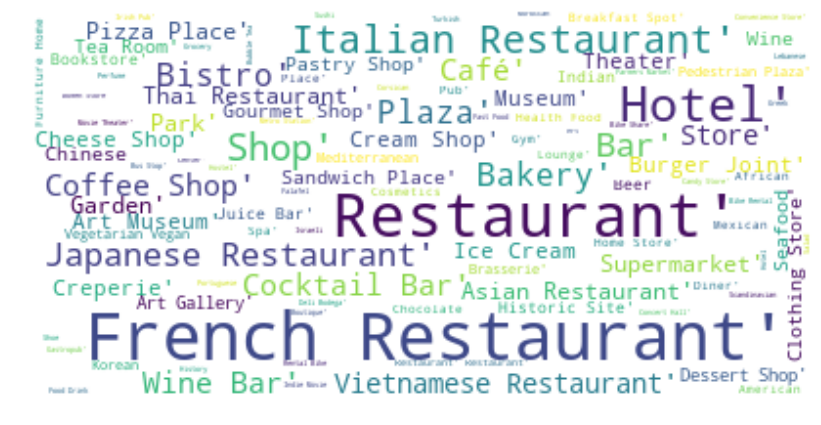

In [14]:
# generate a first word-cloud to explore
Paris_wc.generate(text)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(Paris_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


### *Categories Wrangling for a better Clustering :*

We now have an idea about which categories to let-down looking for better representation as well as for better significance.

Lets clean our categories from non-significant most repeated categories and regenerate our word-cloud for better insight.


In [15]:
# Cleaning data for better representation and better significance

text_new = text.replace(")(","")

text_new = text_new.replace("'French Restaurant'", "")
#text_new = text_new.replace("'Restaurant'", "")
text_new = text_new.replace("Restaurant", "")
text_new = text_new.replace("Italian", "")
text_new = text_new.replace("Japanese", "")
text_new = text_new.replace("Vietnamese", "")
text_new = text_new.replace("Chinese", "")
text_new = text_new.replace("Korean", "")
text_new = text_new.replace("Asian", "")
text_new = text_new.replace("Thai", "")
text_new = text_new.replace("'Hotel'", "")
text_new = text_new.replace("Food", "")
text_new = text_new.replace("'Drink'", "")
text_new = text_new.replace("Bar", "")
text_new = text_new.replace("'Café'", "")
text_new = text_new.replace("Coffee", "")
text_new = text_new.replace("Wine", "")
text_new = text_new.replace("Cocktail", "")
text_new = text_new.replace("Bistro", "")
text_new = text_new.replace("'Bakery'", "")
text_new = text_new.replace("'Pizza Place'", "")
text_new = text_new.replace("Shop", "")
text_new = text_new.replace("Supermarket", "")
text_new = text_new.replace("Store", "")
text_new = text_new.replace("'Plaza'", "")
text_new = text_new.replace("Park", "")

text_new = text_new.replace("'", " ")
text_new = text_new.replace(",   ,", " ")
text_new = text_new.replace(",  ,", ",")
text_new = text_new.replace(",,,,", ",")
text_new = text_new.replace(",,,", ",")
text_new = text_new.replace(",,", ",")
text_new = text_new.replace("/", " ")

print(text_new)

( Art Museum , Historic Site , Theater , , Historic Site , Art Museum , Garden , Pedestrian Plaza , Tea Room , Exhibit , Cosmetics  , Furniture   Home    Udon  , Perfume  , Spa , Garden , Shoe   , Cheese  , Art Museum , Udon  , Boutique , Theater     ,  Dessert  , , Bridge     , Cheese      , , Church , Bubble Tea      , Candy  , Brasserie , General College & University , Candy        Bookstore , Nightclub ,"Women s ", Music  , Historic Site   Perfume      , ,    , Pedestrian Plaza , Burger Joint , Beer  , Salad Place , Peruvian  , Indie Movie Theater , Creperie   Donut  , Souvlaki  , Hotel  ,   "Women s ", Mexican  , Sushi  , Sandwich Place , Gym , Greek  , Pedestrian Plaza , Romanian    Concert Hall , Fish & Chips  , Creperie   Brewery    , Juice      , Cheese  , Indie Movie Theater , Ice Cream  , Israeli  , Farmers Market  , Tea Room , Gourmet  , Ramen  , Candy  , Theater , Cycle Studio , Fish & Chips  ,  Clothing  , Comedy Club , Taiwanese  , Bubble Tea  , Pastry  , Salad Place    

### *Paris Word-Cloud Visualisation*

Finally lets give Paris a satisfying Word-Cloud :

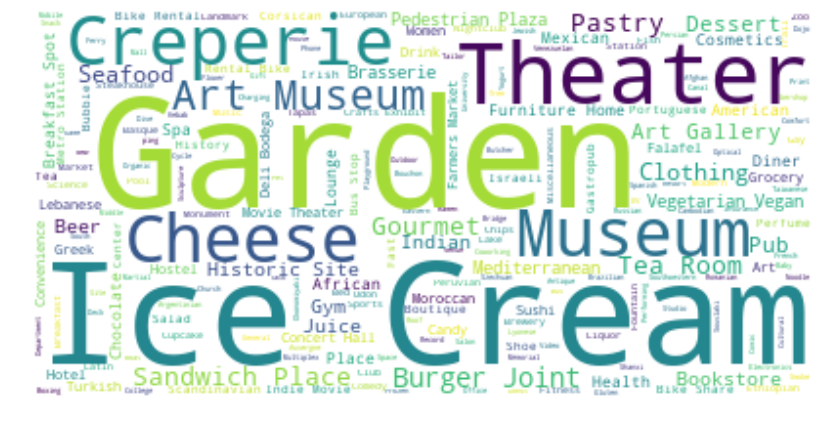

In [16]:
# generate the new word cloud
Paris_wc.generate(text_new) 

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the new word cloud
plt.imshow(Paris_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Lets finish this part visualizing the final Word Cloud for Paris venues categories :

Paris Mask Image downloaded and saved!


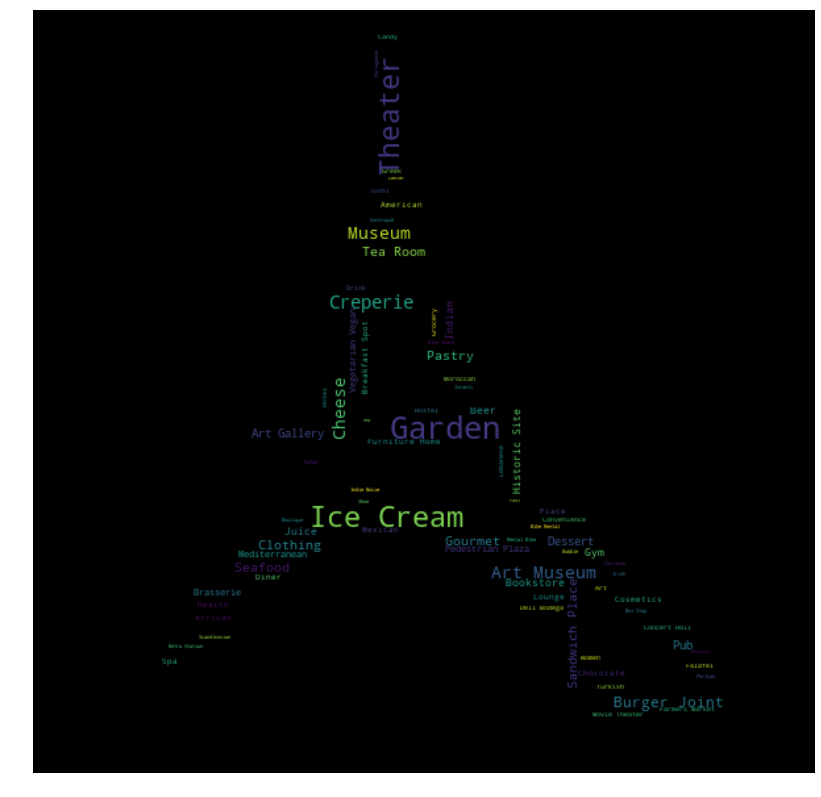

In [18]:
# Importing a Mask for Paris categories word cloud
paris_mask = np.array(Image.open("paris_mask_1.png"))
print('Paris Mask Image downloaded and saved!')

# instantiate a new word cloud object    
Paris_wc = WordCloud(
    background_color='black',
    max_words=2000,
    mask=paris_mask,
    stopwords=stopwords)

Paris_wc.generate(text_new)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the final word cloud for Paris
plt.imshow(Paris_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


### *Analysing Paris Neighborhoods*

Now that we have a clean form of the foursquare data of Paris venues and their categories we can try putting the neiborhoods on the scope and explore the most frequent activity categories these neighborhoods provide. 

Afterwords we will be trying to Cluster our neighborhoods based on these categories in order to locate the best neighborhoods for each business activitie and locate high trafic areas or more adequate locations for certain groups of preferences or activity categories.

First, One hot encoding :

In [19]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")
paris_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Add 'Neighborhood' column back to dataframe in the first column of one hot encoding dataframe


In [20]:
paris_onehot.insert(loc=0, column='Neighborhood', value=paris_venues['Neighborhood'] )

Checking dataframe shape

In [21]:
print(paris_onehot.shape)
paris_onehot.head()

(1237, 198)


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Louvre,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Louvre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by 'Neighborhood' and by taking the mean of the **frequency of occurrence of each Category** within our one hot encoding dataframe columns

In [22]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Batignolles-Monceau,0.0,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.0,0.00,...,0.0,0.00,0.0,0.0,0.000000,0.000,0.017857,0.00,0.0,0.0
1,Bourse,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.00,0.0,0.0,0.000000,0.070,0.010000,0.02,0.0,0.0
2,Buttes-Chaumont,0.0,0.023256,0.023256,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.00,0.0,0.0,0.023256,0.000,0.000000,0.00,0.0,0.0
3,Buttes-Montmartre,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.00,0.0,0.0,0.025000,0.025,0.000000,0.00,0.0,0.0
4,Entrepot,0.0,0.020000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.02,...,0.0,0.01,0.0,0.0,0.000000,0.020,0.020000,0.00,0.0,0.0



Let's print each Neighborhood along with the top 5 most common venues

In [23]:
num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+ hood +"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

----Batignolles-Monceau----
                 venue  freq
0    French Restaurant  0.18
1                Hotel  0.18
2   Italian Restaurant  0.11
3  Japanese Restaurant  0.07
4                 Café  0.05
5               Bakery  0.05
6                Plaza  0.04
7               Bistro  0.04
8           Restaurant  0.02
9      Thai Restaurant  0.02


----Bourse----
                 venue  freq
0    French Restaurant  0.13
1             Wine Bar  0.07
2                Hotel  0.06
3         Cocktail Bar  0.06
4   Italian Restaurant  0.03
5               Bakery  0.03
6               Bistro  0.03
7          Salad Place  0.02
8          Pastry Shop  0.02
9  Indie Movie Theater  0.02


----Buttes-Chaumont----
                venue  freq
0   French Restaurant  0.09
1                 Bar  0.09
2         Supermarket  0.07
3               Hotel  0.05
4  Seafood Restaurant  0.05
5            Beer Bar  0.05
6              Bistro  0.05
7          Steakhouse  0.02
8              Hostel  0.02
9          

Let's put that into a pandas dataframe.

First, let's write a function to sort the venues in descending order.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 20 venues categories for each neighborhood.

In [25]:
num_top_venues = 20 # number of categories to consider per each neighborhood

indicators = ['st', 'nd', 'rd'] # The order of columns names

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Activity'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Activity'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,8th Most Common Venue Activity,9th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
0,Batignolles-Monceau,Hotel,French Restaurant,Italian Restaurant,Japanese Restaurant,Café,Bakery,Plaza,Bistro,Concert Hall,...,Portuguese Restaurant,Diner,Chinese Restaurant,Burger Joint,Metro Station,Pastry Shop,Restaurant,Mediterranean Restaurant,Art Museum,Grocery Store
1,Bourse,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Italian Restaurant,Bistro,Bakery,Pastry Shop,Salad Place,...,Burger Joint,Cheese Shop,Creperie,Pedestrian Plaza,Fish & Chips Shop,Thai Restaurant,Clothing Store,Women's Store,Concert Hall,Music Store
2,Buttes-Chaumont,Bar,French Restaurant,Supermarket,Hotel,Bistro,Seafood Restaurant,Beer Bar,Pizza Place,Burger Joint,...,Café,Restaurant,Canal,Coffee Shop,Plaza,Spa,Concert Hall,Creperie,Music Store,Farmers Market
3,Buttes-Montmartre,Bar,French Restaurant,Coffee Shop,Restaurant,Convenience Store,Deli / Bodega,Sandwich Place,Café,Cheese Shop,...,Pizza Place,Middle Eastern Restaurant,Bistro,Fast Food Restaurant,Mediterranean Restaurant,Gastropub,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,Indian Restaurant
4,Entrepot,French Restaurant,Hotel,Coffee Shop,Bistro,Café,Indian Restaurant,Pizza Place,Japanese Restaurant,Mediterranean Restaurant,...,Breakfast Spot,Cocktail Bar,Restaurant,Burger Joint,Korean Restaurant,Seafood Restaurant,Wine Bar,Italian Restaurant,Bakery,Wine Shop


### *Cluster Neighborhoods*

In order to cluster Paris neighborhoods we decide to run k-means algorithm to cluster the neighborhood into 5 clusters based on their top 20 venues categories.

We choose to cluster Paris city Neighborhoods to 5 clusters out of 20 District which can be plausible or significant. 

One can choose the most adequate number of clusters based on observations, or the number of neighborhood types on which we want to distribute/Cluster Paris Neighborhoods based on their most frequent corresponding activities.

To solve the ambiguity of which K to use for K-Means Clustering one can proceed using Dicision Trees and dendrogram for better choice of number of clusters to use.


In [26]:
# Set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(paris_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([4, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster labels as well as the top 20 venues for each neighborhood.

In [27]:
# Add clustering labels
#neighborhoods_venues_sorted.drop('Cluster_Labels', axis = 1, inplace = True)

neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

# Merge Paris_grouped with paris_data to add latitude/longitude for each neighborhood
paris_merged = paris_data.copy()
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged # check the last columns!

,Arrondissement_Num,Arrondissement,Neighborhood,Latitude,Longitude,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
0,1,1er Ardt,Louvre,48.862563,2.336443,1824612860,1,French Restaurant,Hotel,Japanese Restaurant,...,Historic Site,Udon Restaurant,Coffee Shop,Thai Restaurant,Church,Furniture / Home Store,Dessert Shop,Restaurant,Exhibit,Bubble Tea Shop
1,2,2eme Ardt,Bourse,48.868279,2.342803,991153745,1,French Restaurant,Wine Bar,Hotel,...,Burger Joint,Cheese Shop,Creperie,Pedestrian Plaza,Fish & Chips Shop,Thai Restaurant,Clothing Store,Women's Store,Concert Hall,Music Store
2,3,3eme Ardt,Temple,48.862872,2.360001,1170882828,1,French Restaurant,Japanese Restaurant,Cocktail Bar,...,Chinese Restaurant,Bookstore,Bistro,Bakery,Wine Shop,Vietnamese Restaurant,Italian Restaurant,Garden,Frozen Yogurt Shop,Farmers Market
3,4,4eme Ardt,Hotel-de-Ville,48.854341,2.357630,1600585632,1,French Restaurant,Ice Cream Shop,Hotel,...,Tea Room,Coffee Shop,Cocktail Bar,Creperie,Gay Bar,Pastry Shop,Art Gallery,Lyonese Bouchon,Falafel Restaurant,Scandinavian Restaurant
4,5,5eme Ardt,Pantheon,48.844443,2.350715,2539374623,1,French Restaurant,Italian Restaurant,Bakery,...,Falafel Restaurant,Science Museum,Creperie,Bistro,Bar,Greek Restaurant,Wine Bar,Garden,Vietnamese Restaurant,Historic Site
5,6,6eme Ardt,Luxembourg,48.849130,2.332898,2153095586,1,French Restaurant,Plaza,Theater,...,Market,Bus Stop,Miscellaneous Shop,Café,Garden,Electronics Store,Pub,Chocolate Shop,Playground,Pastry Shop
6,7,7eme Ardt,Palais-Bourbon,48.856174,2.312188,4090057185,4,Hotel,French Restaurant,Italian Restaurant,...,Japanese Restaurant,Gourmet Shop,Garden,Dessert Shop,Coffee Shop,Cheese Shop,Irish Pub,Art Museum,Park,New American Restaurant
7,8,8eme Ardt,elysee,48.872721,2.312554,3880036397,4,French Restaurant,Hotel,Corsican Restaurant,...,Modern European Restaurant,Furniture / Home Store,Grocery Store,Bar,Hotel Bar,Thai Restaurant,Italian Restaurant,Art Museum,Insurance Office,Theater
8,9,9eme Ardt,Opera,48.877164,2.337458,2178303275,1,French Restaurant,Hotel,Cocktail Bar,...,Bar,Cheese Shop,Pizza Place,Theater,Café,Turkish Restaurant,Vegetarian / Vegan Restaurant,Creperie,Coffee Shop,Restaurant
9,10,10eme Ardt,Entrepot,48.876130,2.360728,2891739442,1,French Restaurant,Hotel,Coffee Shop,...,Breakfast Spot,Cocktail Bar,Restaurant,Burger Joint,Korean Restaurant,Seafood Restaurant,Wine Bar,Italian Restaurant,Bakery,Wine Shop


Lets check our final dataframe for missing values before Mapping our result clusters

In [28]:
print(paris_merged.describe())
print("\nMissing values per column :\n", paris_merged.isnull().sum(axis = 0))

       Arrondissement_Num   Latitude  Longitude       SURFACE  Cluster_Labels
count            20.00000  20.000000  20.000000  2.000000e+01       20.000000
mean             10.50000  48.860320   2.344468  5.268639e+09        1.700000
std               5.91608   0.018815   0.037412  4.362220e+09        1.301821
min               1.00000  48.828388   2.261971  9.911537e+08        0.000000
25%               5.75000  48.847959   2.323045  2.172001e+09        1.000000
50%              10.50000  48.861477   2.345482  3.985047e+09        1.000000
75%              15.25000  48.873573   2.361114  6.195201e+09        2.250000
max              20.00000  48.892569   2.421325  1.637254e+10        4.000000

Missing values per column :
 Arrondissement_Num                 0
Arrondissement                     0
Neighborhood                       0
Latitude                           0
Longitude                          0
SURFACE                            0
Cluster_Labels                     0
1st Most 

As we checked, there were fortunately no missing values within our final data frame.

### *Mapping Paris Neighborhoods Clusters :*

We can now visualize the resulting clusters of Paris neighborhoods with respect to their 10 most frequent corresponding/scrapped activities 

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cat1, cat2, cat3 in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster_Labels'], paris_merged['1st Most Common Venue Activity'],paris_merged['2nd Most Common Venue Activity'],paris_merged['3rd Most Common Venue Activity']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ',' + str(cat1) + ',' + str(cat2) + ',' + str(cat3), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### Examine Clusters

Lets examine our result neighborhood clusters in Paris City.

##### Cluster 1 :

In [30]:
paris_merged.loc[paris_merged['Cluster_Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]



,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
12,13eme Ardt,7149311091,0,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Plaza,...,Butcher,Gourmet Shop,Print Shop,Coffee Shop,Park,Creperie,Furniture / Home Store,Convenience Store,Trail,Bakery


##### Cluster 2  :

In [31]:
paris_merged.loc[paris_merged['Cluster_Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
0,1er Ardt,1824612860,1,French Restaurant,Hotel,Japanese Restaurant,Plaza,Italian Restaurant,Art Museum,Garden,...,Historic Site,Udon Restaurant,Coffee Shop,Thai Restaurant,Church,Furniture / Home Store,Dessert Shop,Restaurant,Exhibit,Bubble Tea Shop
1,2eme Ardt,991153745,1,French Restaurant,Wine Bar,Hotel,Cocktail Bar,Italian Restaurant,Bistro,Bakery,...,Burger Joint,Cheese Shop,Creperie,Pedestrian Plaza,Fish & Chips Shop,Thai Restaurant,Clothing Store,Women's Store,Concert Hall,Music Store
2,3eme Ardt,1170882828,1,French Restaurant,Japanese Restaurant,Cocktail Bar,Wine Bar,Gourmet Shop,Art Gallery,Burger Joint,...,Chinese Restaurant,Bookstore,Bistro,Bakery,Wine Shop,Vietnamese Restaurant,Italian Restaurant,Garden,Frozen Yogurt Shop,Farmers Market
3,4eme Ardt,1600585632,1,French Restaurant,Ice Cream Shop,Hotel,Clothing Store,Garden,Pedestrian Plaza,Italian Restaurant,...,Tea Room,Coffee Shop,Cocktail Bar,Creperie,Gay Bar,Pastry Shop,Art Gallery,Lyonese Bouchon,Falafel Restaurant,Scandinavian Restaurant
4,5eme Ardt,2539374623,1,French Restaurant,Italian Restaurant,Bakery,Hotel,Museum,Coffee Shop,Plaza,...,Falafel Restaurant,Science Museum,Creperie,Bistro,Bar,Greek Restaurant,Wine Bar,Garden,Vietnamese Restaurant,Historic Site
5,6eme Ardt,2153095586,1,French Restaurant,Plaza,Theater,Dessert Shop,Wine Bar,Fountain,Cocktail Bar,...,Market,Bus Stop,Miscellaneous Shop,Café,Garden,Electronics Store,Pub,Chocolate Shop,Playground,Pastry Shop
8,9eme Ardt,2178303275,1,French Restaurant,Hotel,Cocktail Bar,Bistro,Lounge,Wine Bar,Bakery,...,Bar,Cheese Shop,Pizza Place,Theater,Café,Turkish Restaurant,Vegetarian / Vegan Restaurant,Creperie,Coffee Shop,Restaurant
9,10eme Ardt,2891739442,1,French Restaurant,Hotel,Coffee Shop,Bistro,Café,Indian Restaurant,Pizza Place,...,Breakfast Spot,Cocktail Bar,Restaurant,Burger Joint,Korean Restaurant,Seafood Restaurant,Wine Bar,Italian Restaurant,Bakery,Wine Shop
10,11eme Ardt,3665441552,1,French Restaurant,Restaurant,Supermarket,Wine Bar,Pastry Shop,Japanese Restaurant,Pizza Place,...,Bar,Italian Restaurant,Café,Pub,Performing Arts Venue,Coffee Shop,Record Shop,Park,Afghan Restaurant,Nightclub
14,15eme Ardt,8494994081,1,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Park,Bakery,Brasserie,...,Japanese Restaurant,Indian Restaurant,Café,Restaurant,Plaza,Russian Restaurant,Scandinavian Restaurant,Gym,Irish Pub,Persian Restaurant


##### Cluster 3 :

In [32]:
paris_merged.loc[paris_merged['Cluster_Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
11,12eme Ardt,16314782637,2,Zoo Exhibit,Park,Supermarket,Bike Rental / Bike Share,Monument / Landmark,Zoo,Creperie,...,Farmers Market,Falafel Restaurant,Exhibit,Cosmetics Shop,Ethiopian Restaurant,Electronics Store,EV Charging Station,Donut Shop,Dive Bar,Flower Shop


##### Cluster 4 :                                                                 

In [33]:
paris_merged.loc[paris_merged['Cluster_Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
15,16eme Ardt,16372542129,3,Plaza,Lake,Park,Bus Stop,Bus Station,French Restaurant,Boat or Ferry,...,Dessert Shop,Hotel,Exhibit,Ethiopian Restaurant,Electronics Store,EV Charging Station,Donut Shop,Dive Bar,Diner,Department Store


##### Cluster 5 :

In [34]:
paris_merged.loc[paris_merged['Cluster_Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
6,7eme Ardt,4090057185,4,Hotel,French Restaurant,Italian Restaurant,Café,Plaza,Bistro,History Museum,...,Japanese Restaurant,Gourmet Shop,Garden,Dessert Shop,Coffee Shop,Cheese Shop,Irish Pub,Art Museum,Park,New American Restaurant
7,8eme Ardt,3880036397,4,French Restaurant,Hotel,Corsican Restaurant,Art Gallery,Spa,Japanese Restaurant,Park,...,Modern European Restaurant,Furniture / Home Store,Grocery Store,Bar,Hotel Bar,Thai Restaurant,Italian Restaurant,Art Museum,Insurance Office,Theater
13,14eme Ardt,5614877309,4,French Restaurant,Hotel,Supermarket,Tea Room,Pizza Place,Organic Grocery,EV Charging Station,...,Bistro,Bike Rental / Bike Share,Sushi Restaurant,Convenience Store,Italian Restaurant,Bakery,Gourmet Shop,History Museum,Ethiopian Restaurant,Electronics Store
16,17eme Ardt,5668834504,4,Hotel,French Restaurant,Italian Restaurant,Japanese Restaurant,Café,Bakery,Plaza,...,Portuguese Restaurant,Diner,Chinese Restaurant,Burger Joint,Metro Station,Pastry Shop,Restaurant,Mediterranean Restaurant,Art Museum,Grocery Store



Now lets say, The business types criteria we desire to have isights about are **'French Restaurants', 'Coffé Shop' and 'Wine Bars'**.

For this we can use our one hot encoding dataframe from the first clustering 'paris_onehot' data frame.

Let's look at their frequency of occurance for all the Paris neighborhoods, isolating the categorical venues.

I've used **Violin Plots** from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

These are the venues categories types that we wants to have an abundant density of in the ideal store locations.


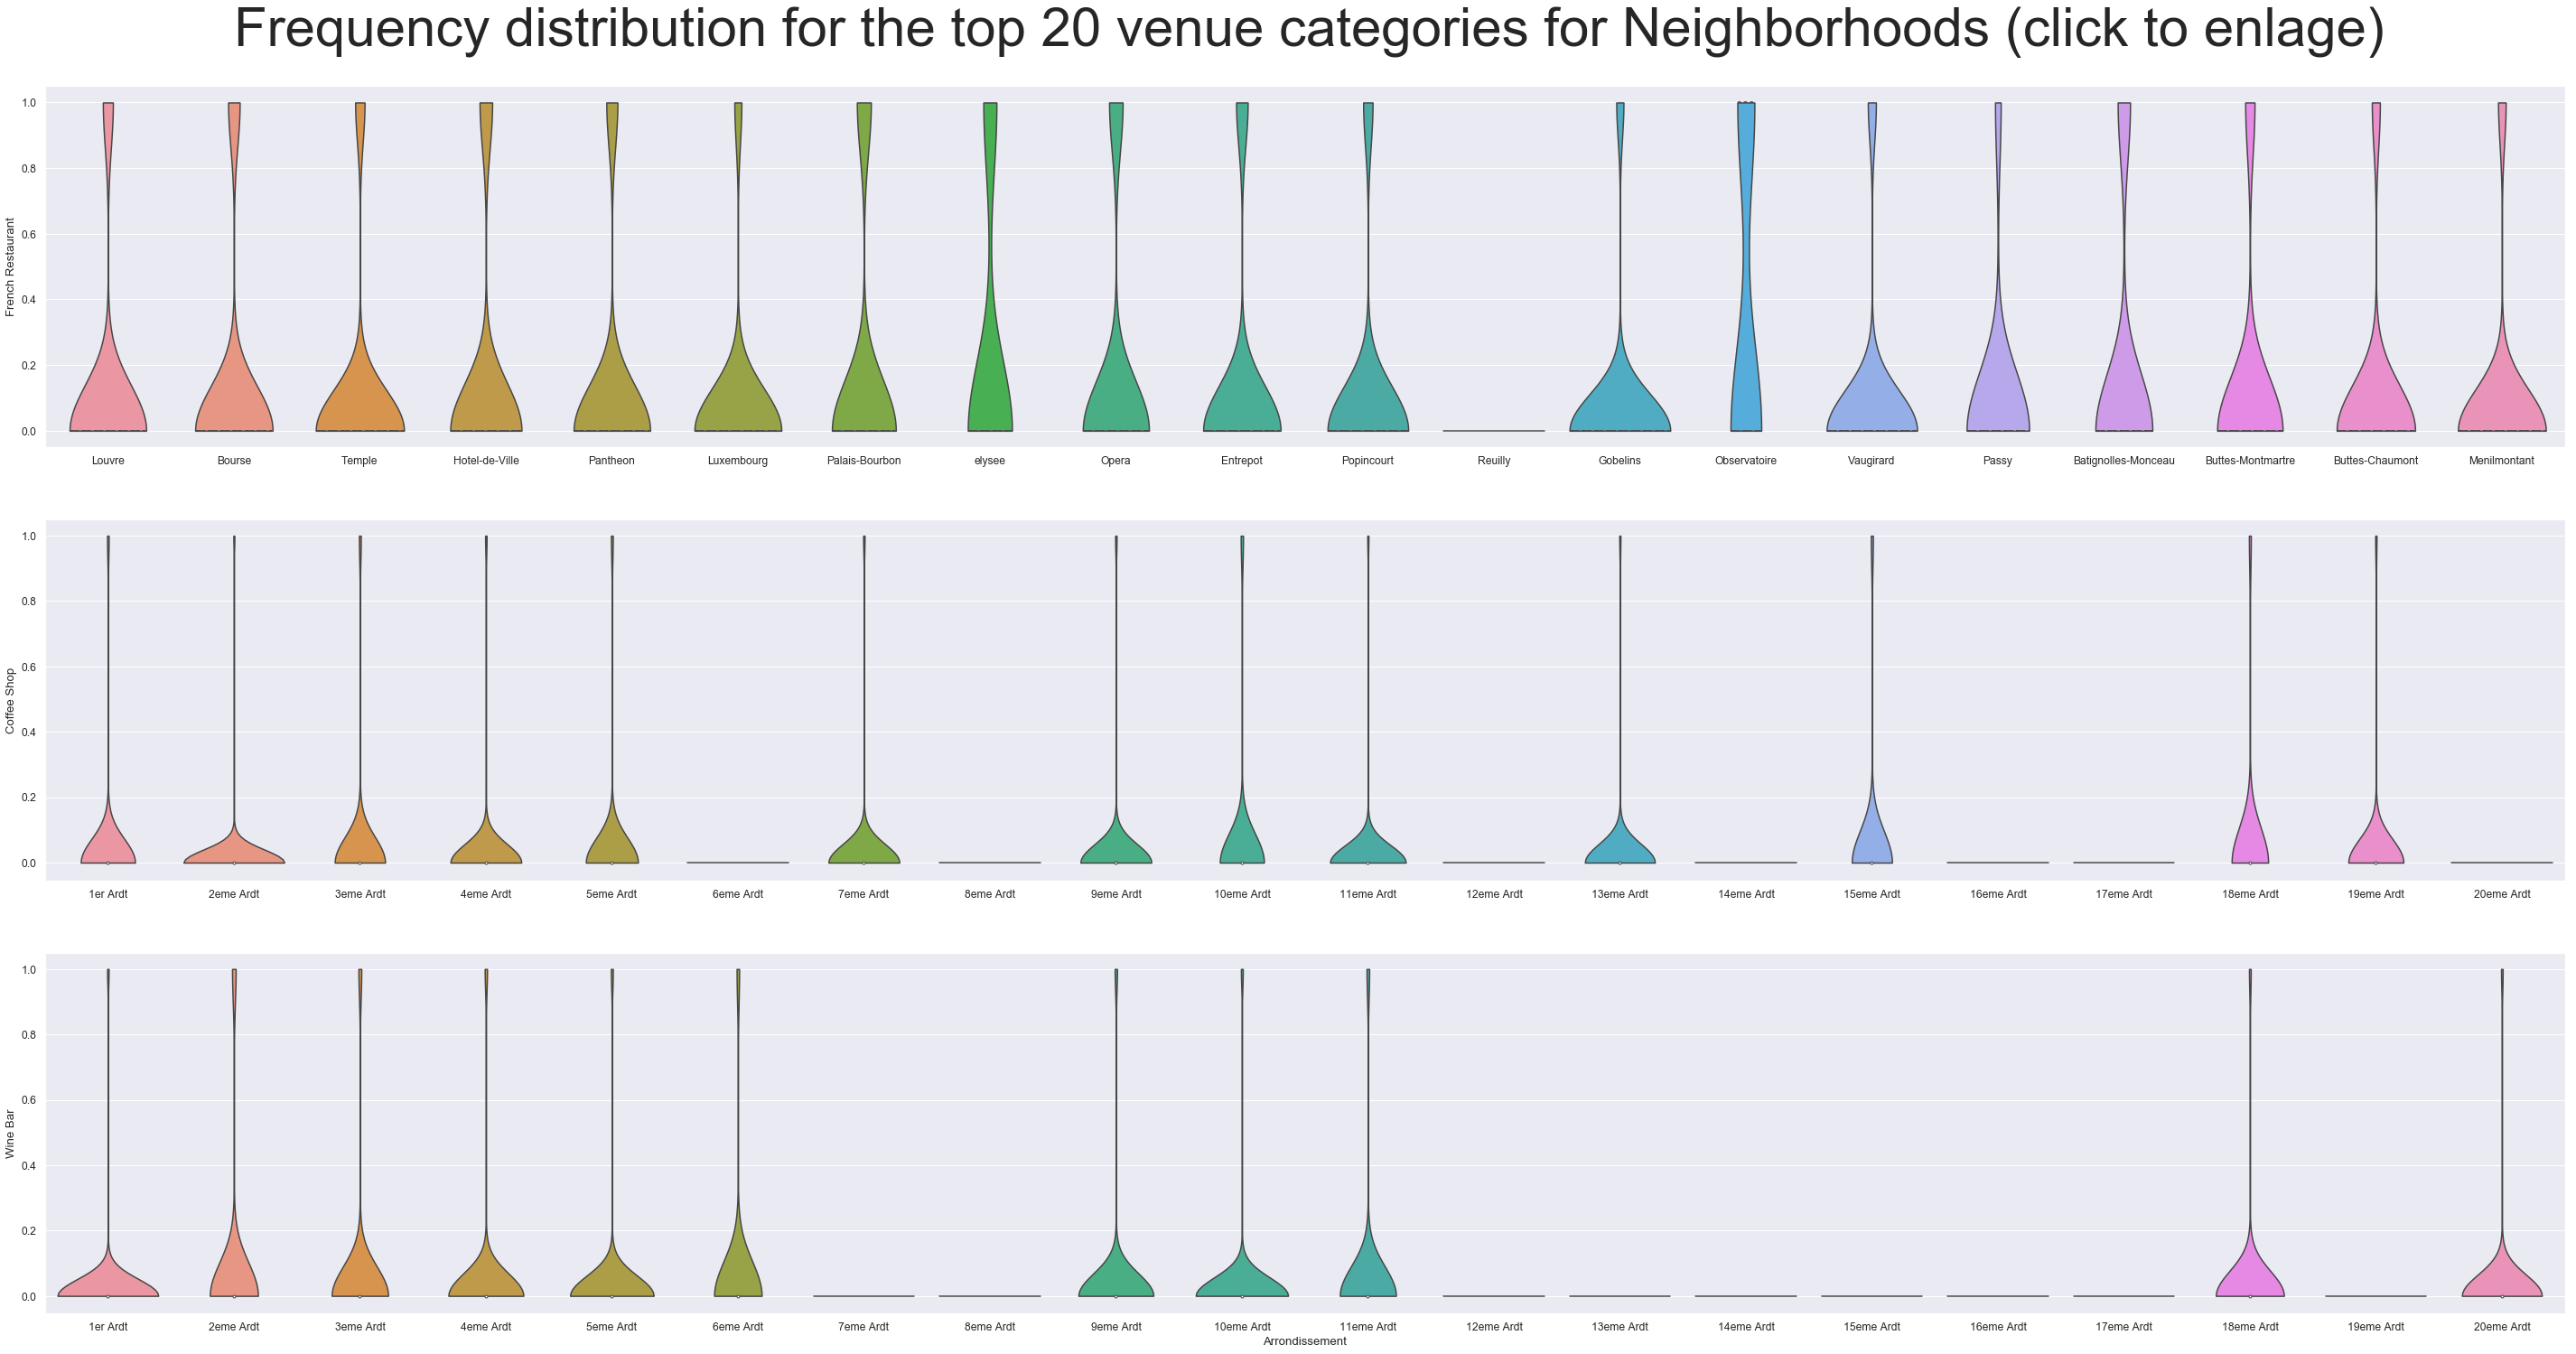

In [36]:
# Categorical plot to Explore this data (Violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified for each neighborhood are used for the plotting.

import seaborn as sns

# First we joint One hot encoding data frame for better representation of Violin Plots
paris_violin = paris_onehot.copy()
paris_violin = paris_violin.join(paris_data.set_index('Neighborhood'), on='Neighborhood')


fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_violin, cut=0, inner="quartile");
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Arrondissement", y="Coffee Shop", data=paris_violin, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Arrondissement", y="Wine Bar", data=paris_violin, cut=0);

ax.text(1.0, 2.5, 'Frequency distribution for the top 20 venue categories for Neighborhoods (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_categories.png", dpi=240)

plt.show()


### *Observations*

So as we can see from the analysis there are 9 neighborhoods to open new stores - according to the criteria that they have the 3 specified venues in a great frequency (French Restaurants, Coffee Shops and Wine Bars).

They are as follows :
- 1 Arrondissement - Louvre
- 2 Arrondissement - Bourse
- 3 Arrondissement - Temple
- 4 Arrondissement - Hotel-de-Ville
- 5 Arrondissement - Pantheon
- 9 Arrondissement - Opera
- 10 Arrondissement - Entrepot
- 11 Arrondissement - Popincourt
- 18 Arrondissement - Buttes-Montmartre


Let's take this further with some exploration and Inferential Analysis.

We have the 9 neighborhoods that all include the venue category criteria.

But if we included the 'Clothing_Store" venue category into the analysis, then we might be able to make some inferences based on the data, and domain knowledge of marketing and the industry, to focus the list.

Let's add the venue category  **'Clothing Store'** :


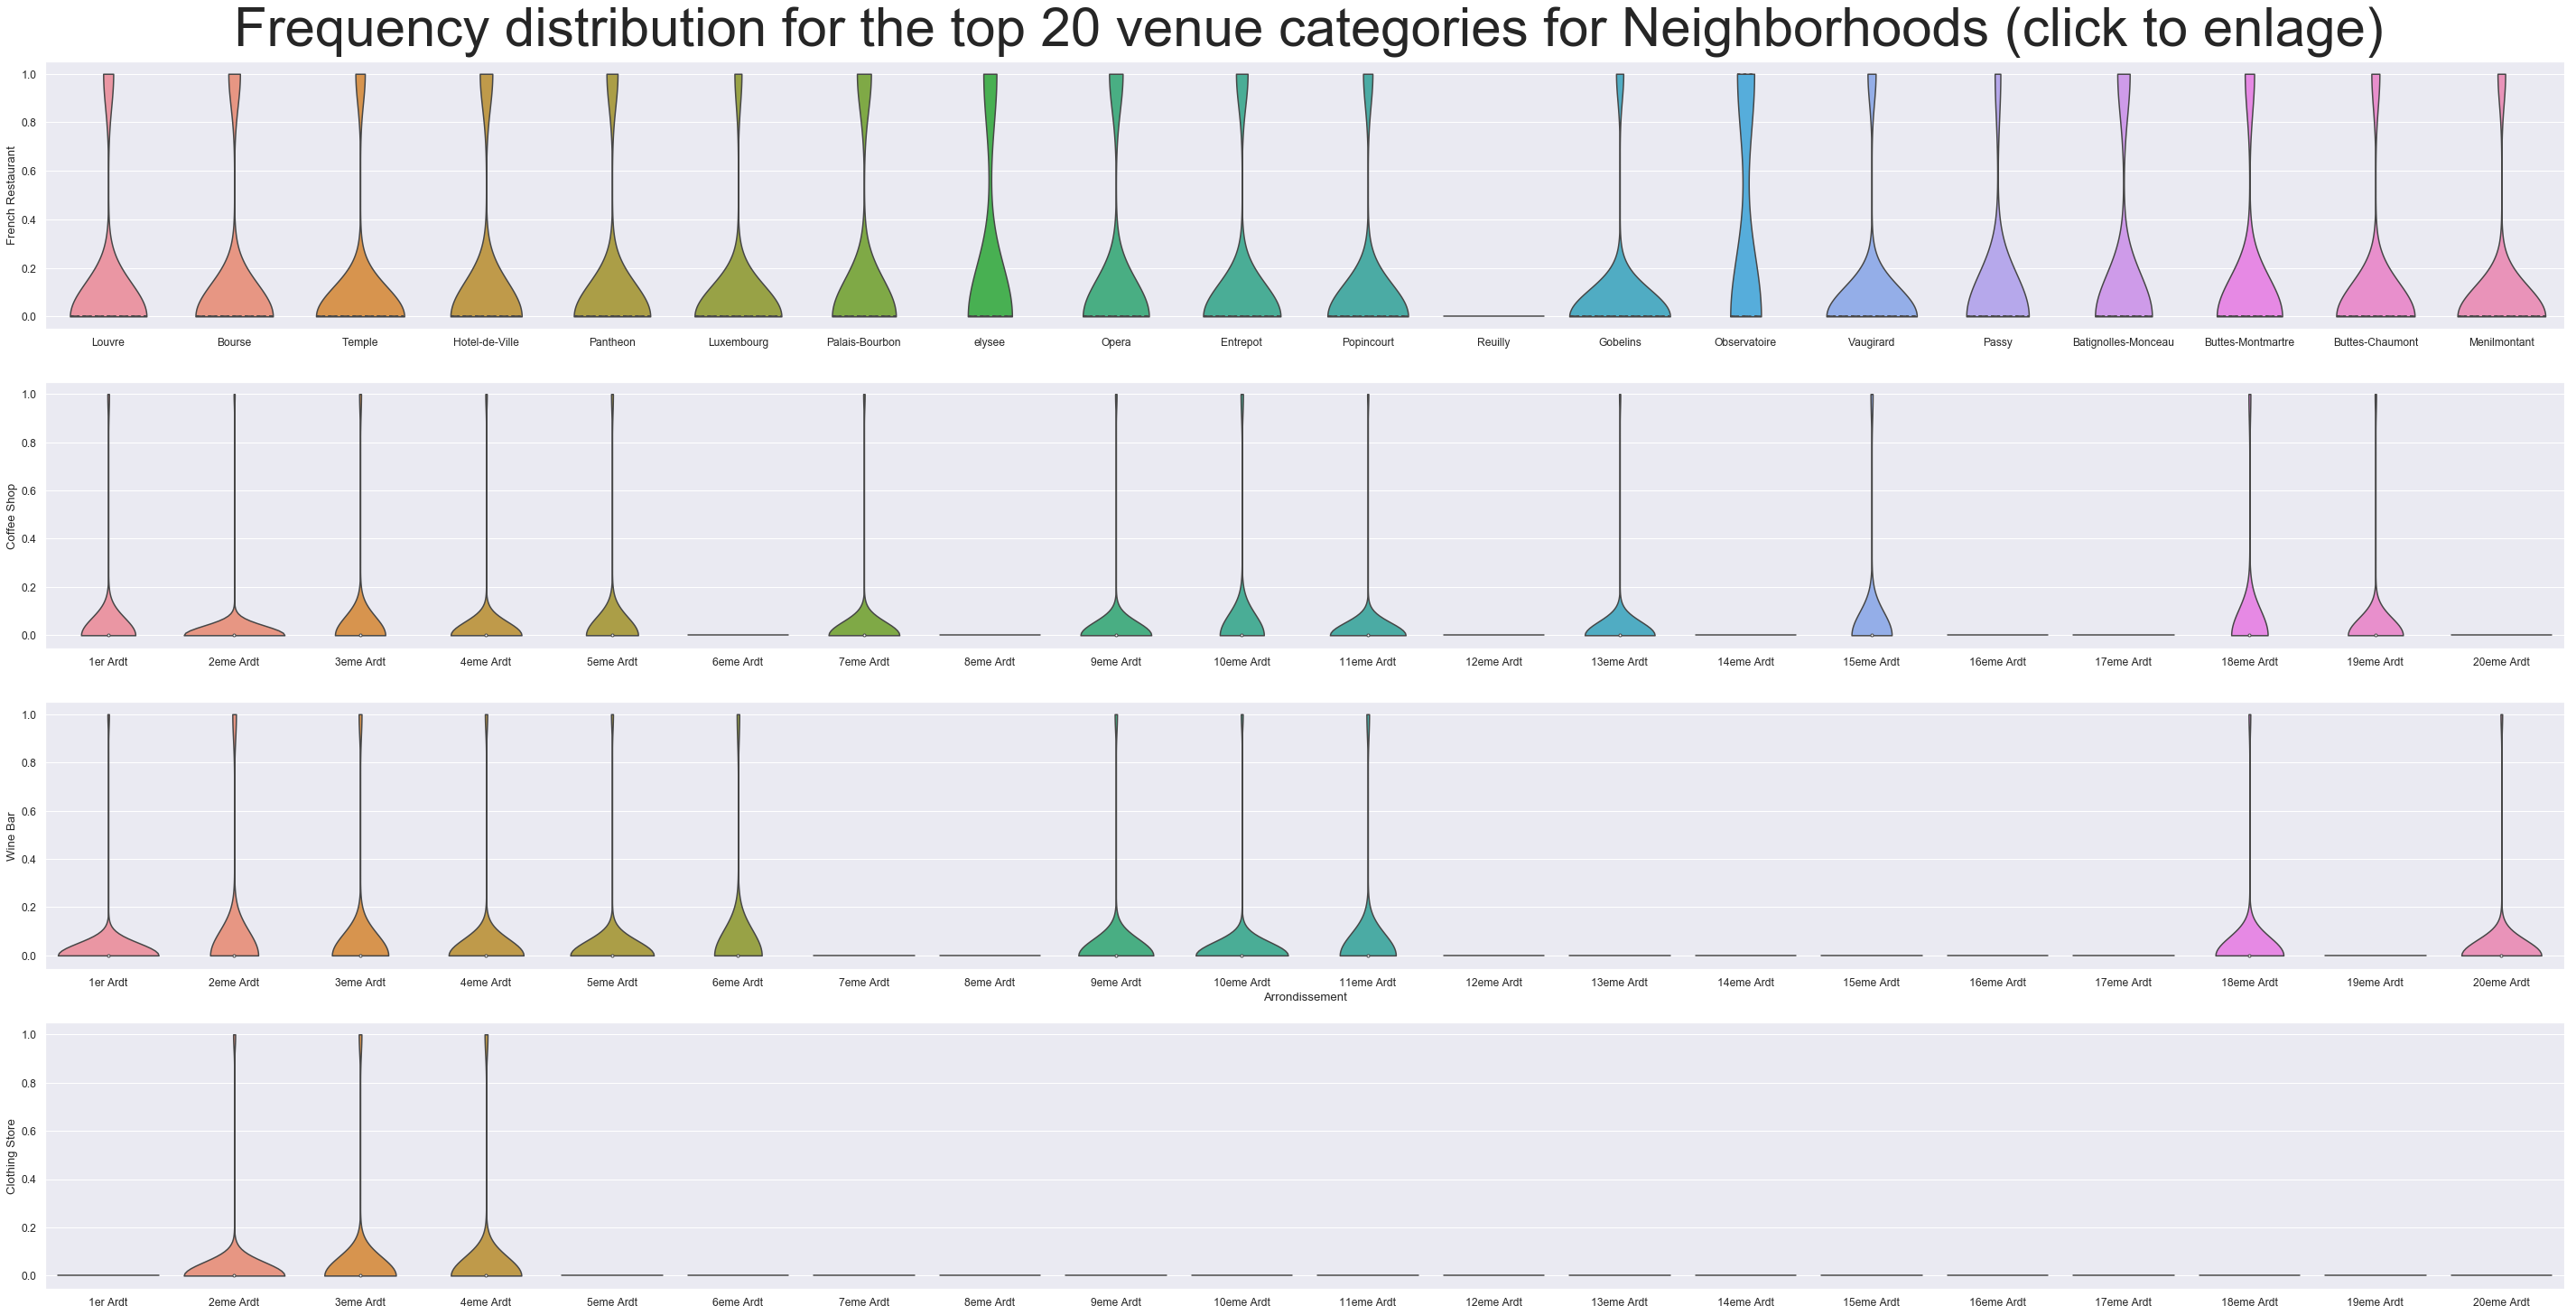

In [37]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_violin, cut=0, inner="quartile");
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Arrondissement", y="Coffee Shop", data=paris_violin, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Arrondissement", y="Wine Bar", data=paris_violin, cut=0);

ax = plt.subplot(4,1,4)
sns.violinplot(x="Arrondissement", y="Clothing Store", data=paris_violin, cut=0)
plt.xlabel("")

ax.text(1.0, 5.1, 'Frequency distribution for the top 20 venue categories for Neighborhoods (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_categories.png", dpi=240)

plt.show()



### 1st Inferences and Discussion : *Chosen Neighborhoods - Results*

Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 3 neighbourhoods from the previous 9.

The reasoning being that if the 3 criteria have been met - identifying neighbourhoods that are lively with Restaurants, Coffee Shop and Wine Bars - adding Clothing Stores into the mix of stores in the area is a significant bonus. Having some of the same category of stores in the same area - very desirable for retailers.

We can increase **the criteria to include Restaurants, Coffee Shop, Wine Bars and Clothing Stores** - which narrows down and focuses the suggested districts for new stores to be located, and at the same time provides better locations for the brand.

So the final 3 prospective neighborhoods for new store locations are where 4 criteria are met:

- **Arrondissement 2, Bourse**
- **Arrondissement 3, Temple**
- **Arrondissement 4, Hotel de Ville**.

Now , let's take this to a next level in the next section.


## Paris Hidden Activities Clustering

At this level, we'll be clustering Paris Neighborhoods with respect to their hidden categories. As we saw above there are some activities that are very frequent and can prevent us to have better vision of somme **less frequent** activities.

We can try to **Exclude** the **'Frensh Restaurants' , 'Bars', 'Hotels'** and other whole Paris omnipresent/most frequent activities or categories and recheck the clusters. This in order to have better insight about other hidden categories  selection of clusters based on other more significant category classes than the specified categories which seem evident to have all over Paris City Neighbours.

Note that *we might have to re-Scale* our data for better clustering *after excluding these categories.*
    
Afterwords we would re-check our clusters and explore our cibling neighborhoods for trending spots if possible, and their density within their corresponding neighbourhoods. 

Otherwise, we can restrict to neighborhoods geographic **'Density'** as new creteria to have insights. We can define **Density** as the *quotient of Neighborhoods **'SURFACE'** to the number of corresponding venues*. 

We can try to make use of this to get insights about desity of Neighborhoods in order to classify Neighbors/Clusters with respect to their **levels of density**.
    
To conclude one can choose, depending on his strategy, the most suitable locations in Paris for activities of his intrest.
    
For this, we'll have to proceed same as we did above. Lets One hot encode our categories and drop afterwords the selected categories.

#### *One hot encoding*

In [42]:
paris_onehot_new = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")
paris_onehot_new.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### *Data Wragling & Cleaning :*

In [43]:
# Drop the selected ingnificant categories

#paris_onehot_new.drop(['Neighborhood'],axis=1,inplace=True)
paris_onehot_new.drop(['French Restaurant', 'Restaurant', 'Bar', 'Hotel','Café','Bakery'],axis=1,inplace=True) # ['French Restaurant', 'Restaurant','Restaurants','Bar','Bars', 'Hotel','Hotels']

# clean columns
#paris_onehot_new.columns = [col.split('.')[-1] for col in paris_onehot.columns]

paris_onehot_new.head()



,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Re-insert Neighborhood column
paris_onehot_new.insert(loc=0, column='Neighborhood', value=paris_venues['Neighborhood'] )

# The frequency of occurrence of each Category within our one hot encoding dataframe columns
paris_grouped_new = paris_onehot_new.groupby('Neighborhood').mean().reset_index()

Lets print **Top 20** Venues **'Hidden'** Categories :

In [45]:
# Get the top N° Category for each Neighborhood
num_top_venues = 10

for hood in paris_grouped_new['Neighborhood']:
    print("----"+ hood +"----")
    temp = paris_grouped_new[paris_grouped_new['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Batignolles-Monceau----
                   venue  freq
0     Italian Restaurant  0.11
1    Japanese Restaurant  0.07
2                  Plaza  0.04
3                 Bistro  0.04
4     Turkish Restaurant  0.02
5           Burger Joint  0.02
6     Chinese Restaurant  0.02
7  Portuguese Restaurant  0.02
8          Grocery Store  0.02
9            Pastry Shop  0.02


----Bourse----
                venue  freq
0            Wine Bar  0.07
1        Cocktail Bar  0.06
2  Italian Restaurant  0.03
3              Bistro  0.03
4     Thai Restaurant  0.02
5   Fish & Chips Shop  0.02
6    Pedestrian Plaza  0.02
7         Pastry Shop  0.02
8         Salad Place  0.02
9            Creperie  0.02


----Buttes-Chaumont----
                venue  freq
0         Supermarket  0.07
1              Bistro  0.05
2            Beer Bar  0.05
3  Seafood Restaurant  0.05
4         Music Store  0.02
5             Brewery  0.02
6          Steakhouse  0.02
7        Burger Joint  0.02
8                 Spa  0.02


Now lets transform that to a data frame. We'll keep the first 20 Categories for each Neighborhood based on their frequency.

In [46]:
num_top_venues = 20 # number of categories to consider per each neighborhood

indicators = ['st', 'nd', 'rd'] # The order of columns names

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Activity'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Activity'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_new = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_new['Neighborhood'] = paris_grouped_new['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted_new.iloc[ind, 1:] = return_most_common_venues(paris_grouped_new.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_new.head()


,Neighborhood,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,8th Most Common Venue Activity,9th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
0,Batignolles-Monceau,Italian Restaurant,Japanese Restaurant,Bistro,Plaza,Pizza Place,Thai Restaurant,Burger Joint,Metro Station,Mediterranean Restaurant,...,Wine Shop,Grocery Store,Portuguese Restaurant,Diner,Concert Hall,Pastry Shop,Turkish Restaurant,Art Museum,Deli / Bodega,Cupcake Shop
1,Bourse,Wine Bar,Cocktail Bar,Italian Restaurant,Bistro,Thai Restaurant,Burger Joint,Cheese Shop,Clothing Store,Pedestrian Plaza,...,Concert Hall,Creperie,Salad Place,Women's Store,Fish & Chips Shop,Indie Movie Theater,Farmers Market,Perfume Shop,Romanian Restaurant,Ramen Restaurant
2,Buttes-Chaumont,Supermarket,Bistro,Beer Bar,Seafood Restaurant,Steakhouse,Spa,Brewery,Burger Joint,Sandwich Place,...,Italian Restaurant,Pizza Place,Concert Hall,Creperie,Music Store,Farmers Market,Metro Station,Martial Arts Dojo,Japanese Restaurant,Coffee Shop
3,Buttes-Montmartre,Coffee Shop,Convenience Store,Italian Restaurant,Bistro,Seafood Restaurant,Sandwich Place,Cheese Shop,Pool,Pizza Place,...,Fast Food Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Gastropub,Gym / Fitness Center,Japanese Restaurant,Health Food Store,Supermarket,Indian Restaurant,Beer Store
4,Entrepot,Coffee Shop,Indian Restaurant,Bistro,Japanese Restaurant,Pizza Place,Italian Restaurant,Asian Restaurant,Korean Restaurant,Mediterranean Restaurant,...,Breakfast Spot,Seafood Restaurant,Cocktail Bar,Wine Shop,Wine Bar,African Restaurant,Lebanese Restaurant,Sandwich Place,Juice Bar,Salad Place


### *Clustering*

Now we can **Cluster** another time Paris neighborhoods based on their top 20 venues hidden categories.

Same as before, we choose to cluster Paris city Neighborhoods to 5 clusters out of 20 District which can be plausible. 

Note that one can choose the most adequate number of clusters based on observation, or the number of neighborhood types on which we want to distribute/Cluster Paris Neighborhoods based on their most frequent corresponding activities.


In [47]:
# Set number of clusters

kclusters = 5

paris_grouped_clustering_new = paris_grouped_new.drop('Neighborhood', 1)
#paris_grouped_clustering_new = StandardScaler().fit_transform(paris_grouped_clustering_new)

# Run k-means clustering
kmeans_new = KMeans(n_clusters = kclusters, random_state=0).fit(paris_grouped_clustering_new)

# Check cluster labels generated for each row in the dataframe
print(kmeans_new.labels_[0:10])

# Add clustering labels
neighborhoods_venues_sorted_new.insert(0, 'Cluster_Labels', kmeans_new.labels_)

# Merge Paris_grouped with paris_data to add latitude/longitude for each neighborhood
paris_merged_new = paris_data.copy()
paris_merged_new = paris_merged_new.join(neighborhoods_venues_sorted_new.set_index('Neighborhood'), on='Neighborhood')

paris_merged_new # check the last columns!



[0 4 4 4 4 2 4 0 4 0]


,Arrondissement_Num,Arrondissement,Neighborhood,Latitude,Longitude,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
0,1,1er Ardt,Louvre,48.862563,2.336443,1824612860,0,Plaza,Japanese Restaurant,Italian Restaurant,...,Cheese Shop,Candy Store,Exhibit,Furniture / Home Store,Boutique,Brasserie,Bridge,Bubble Tea Shop,Wine Shop,Church
1,2,2eme Ardt,Bourse,48.868279,2.342803,991153745,4,Wine Bar,Cocktail Bar,Italian Restaurant,...,Concert Hall,Creperie,Salad Place,Women's Store,Fish & Chips Shop,Indie Movie Theater,Farmers Market,Perfume Shop,Romanian Restaurant,Ramen Restaurant
2,3,3eme Ardt,Temple,48.862872,2.360001,1170882828,4,Japanese Restaurant,Cocktail Bar,Wine Bar,...,Bookstore,Bistro,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Wine Shop,Moroccan Restaurant,Frozen Yogurt Shop,Comic Shop,Dessert Shop
3,4,4eme Ardt,Hotel-de-Ville,48.854341,2.357630,1600585632,4,Ice Cream Shop,Clothing Store,Garden,...,Cocktail Bar,Coffee Shop,Pastry Shop,Gay Bar,Creperie,Chocolate Shop,Portuguese Restaurant,Cheese Shop,Optical Shop,Pizza Place
4,5,5eme Ardt,Pantheon,48.844443,2.350715,2539374623,4,Italian Restaurant,Museum,Coffee Shop,...,Pizza Place,Science Museum,Greek Restaurant,Vietnamese Restaurant,Wine Bar,Peruvian Restaurant,Chocolate Shop,Kebab Restaurant,Korean Restaurant,Liquor Store
5,6,6eme Ardt,Luxembourg,48.849130,2.332898,2153095586,4,Plaza,Dessert Shop,Wine Bar,...,Pub,Cocktail Bar,Pastry Shop,Italian Restaurant,Bistro,Electronics Store,Miscellaneous Shop,Market,Lebanese Restaurant,Garden
6,7,7eme Ardt,Palais-Bourbon,48.856174,2.312188,4090057185,0,Italian Restaurant,Plaza,Bistro,...,Dessert Shop,Coffee Shop,Irish Pub,Historic Site,Art Museum,Health Food Store,Food & Drink Shop,Park,New American Restaurant,Southwestern French Restaurant
7,8,8eme Ardt,elysee,48.872721,2.312554,3880036397,0,Spa,Art Gallery,Corsican Restaurant,...,Park,Cocktail Bar,Resort,Plaza,Hotel Bar,Theater,Art Museum,Thai Restaurant,Department Store,Falafel Restaurant
8,9,9eme Ardt,Opera,48.877164,2.337458,2178303275,4,Cocktail Bar,Bistro,Japanese Restaurant,...,Plaza,Pizza Place,Creperie,Turkish Restaurant,Burger Joint,Candy Store,Sandwich Place,Chinese Restaurant,Scandinavian Restaurant,Chocolate Shop
9,10,10eme Ardt,Entrepot,48.876130,2.360728,2891739442,4,Coffee Shop,Indian Restaurant,Bistro,...,Breakfast Spot,Seafood Restaurant,Cocktail Bar,Wine Shop,Wine Bar,African Restaurant,Lebanese Restaurant,Sandwich Place,Juice Bar,Salad Place


### *Mapping Hidden Clusters*

In [50]:
map_hidden_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cat1, cat2, cat3 in zip(paris_merged_new['Latitude'], paris_merged_new['Longitude'], paris_merged_new['Neighborhood'], paris_merged_new['Cluster_Labels'], paris_merged_new['1st Most Common Venue Activity'],paris_merged_new['2nd Most Common Venue Activity'],paris_merged_new['3rd Most Common Venue Activity']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ ',' + str(cat1) + ',' + str(cat2) + ',' + str(cat3), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_hidden_clusters)
       
map_hidden_clusters


We can re-check the first Map of Clusters for comparaison.

In [51]:
map_clusters

### Examine Paris Hidden Clusters :

Lets examine our result neighborhood clusters in Paris City.

#### *Cluster 1*

In [52]:
paris_merged_new.loc[paris_merged_new['Cluster_Labels'] == 0, paris_merged_new.columns[[1] + list(range(5, paris_merged_new.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
0,1er Ardt,1824612860,0,Plaza,Japanese Restaurant,Italian Restaurant,Art Museum,Garden,Historic Site,Udon Restaurant,...,Cheese Shop,Candy Store,Exhibit,Furniture / Home Store,Boutique,Brasserie,Bridge,Bubble Tea Shop,Wine Shop,Church
6,7eme Ardt,4090057185,0,Italian Restaurant,Plaza,Bistro,History Museum,Cocktail Bar,Japanese Restaurant,Garden,...,Dessert Shop,Coffee Shop,Irish Pub,Historic Site,Art Museum,Health Food Store,Food & Drink Shop,Park,New American Restaurant,Southwestern French Restaurant
7,8eme Ardt,3880036397,0,Spa,Art Gallery,Corsican Restaurant,Italian Restaurant,Insurance Office,Japanese Restaurant,Grocery Store,...,Park,Cocktail Bar,Resort,Plaza,Hotel Bar,Theater,Art Museum,Thai Restaurant,Department Store,Falafel Restaurant
14,15eme Ardt,8494994081,0,Italian Restaurant,Coffee Shop,Park,Lebanese Restaurant,Brasserie,Japanese Restaurant,Thai Restaurant,...,Seafood Restaurant,Cocktail Bar,Plaza,Women's Store,Wine Shop,Hostel,Multiplex,Scandinavian Restaurant,Persian Restaurant,Sports Bar
16,17eme Ardt,5668834504,0,Italian Restaurant,Japanese Restaurant,Bistro,Plaza,Pizza Place,Thai Restaurant,Burger Joint,...,Wine Shop,Grocery Store,Portuguese Restaurant,Diner,Concert Hall,Pastry Shop,Turkish Restaurant,Art Museum,Deli / Bodega,Cupcake Shop
19,20eme Ardt,5983446037,0,Italian Restaurant,Japanese Restaurant,Plaza,Bistro,Mexican Restaurant,Brasserie,Smoke Shop,...,Movie Theater,Metro Station,Food & Drink Shop,Market,Lounge,Liquor Store,Latin American Restaurant,Korean Restaurant,Gourmet Shop,Bookstore


#### *Cluster 2*

In [53]:
paris_merged_new.loc[paris_merged_new['Cluster_Labels'] == 1, paris_merged_new.columns[[1] + list(range(5, paris_merged_new.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
11,12eme Ardt,16314782637,1,Zoo Exhibit,Zoo,Supermarket,Bike Rental / Bike Share,Park,Monument / Landmark,Electronics Store,...,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Donut Shop,EV Charging Station,Dive Bar,Diner,Dessert Shop,Department Store


#### *Cluster 3*

In [54]:
paris_merged_new.loc[paris_merged_new['Cluster_Labels'] == 2, paris_merged_new.columns[[1] + list(range(5, paris_merged_new.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
12,13eme Ardt,7149311091,2,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,Juice Bar,Italian Restaurant,Cosmetics Shop,...,Convenience Store,Creperie,Butcher,Park,Furniture / Home Store,Gourmet Shop,Grocery Store,Japanese Restaurant,Cambodian Restaurant,Plaza


#### *Cluster 4*

In [55]:
paris_merged_new.loc[paris_merged_new['Cluster_Labels'] == 3, paris_merged_new.columns[[1] + list(range(5, paris_merged_new.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
15,16eme Ardt,16372542129,3,Plaza,Lake,Park,Pool,Bus Station,Bus Stop,Art Museum,...,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store,Diner,Donut Shop,Dive Bar,Flower Shop,Dessert Shop


#### *Cluster 5*

In [56]:
paris_merged_new.loc[paris_merged_new['Cluster_Labels'] == 4, paris_merged_new.columns[[1] + list(range(5, paris_merged_new.shape[1]))]]


,Arrondissement,SURFACE,Cluster_Labels,1st Most Common Venue Activity,2nd Most Common Venue Activity,3rd Most Common Venue Activity,4th Most Common Venue Activity,5th Most Common Venue Activity,6th Most Common Venue Activity,7th Most Common Venue Activity,...,11th Most Common Venue Activity,12th Most Common Venue Activity,13th Most Common Venue Activity,14th Most Common Venue Activity,15th Most Common Venue Activity,16th Most Common Venue Activity,17th Most Common Venue Activity,18th Most Common Venue Activity,19th Most Common Venue Activity,20th Most Common Venue Activity
1,2eme Ardt,991153745,4,Wine Bar,Cocktail Bar,Italian Restaurant,Bistro,Thai Restaurant,Burger Joint,Cheese Shop,...,Concert Hall,Creperie,Salad Place,Women's Store,Fish & Chips Shop,Indie Movie Theater,Farmers Market,Perfume Shop,Romanian Restaurant,Ramen Restaurant
2,3eme Ardt,1170882828,4,Japanese Restaurant,Cocktail Bar,Wine Bar,Art Gallery,Gourmet Shop,Coffee Shop,Sandwich Place,...,Bookstore,Bistro,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Wine Shop,Moroccan Restaurant,Frozen Yogurt Shop,Comic Shop,Dessert Shop
3,4eme Ardt,1600585632,4,Ice Cream Shop,Clothing Store,Garden,Park,Pedestrian Plaza,Plaza,Italian Restaurant,...,Cocktail Bar,Coffee Shop,Pastry Shop,Gay Bar,Creperie,Chocolate Shop,Portuguese Restaurant,Cheese Shop,Optical Shop,Pizza Place
4,5eme Ardt,2539374623,4,Italian Restaurant,Museum,Coffee Shop,Plaza,Pub,Bistro,Historic Site,...,Pizza Place,Science Museum,Greek Restaurant,Vietnamese Restaurant,Wine Bar,Peruvian Restaurant,Chocolate Shop,Kebab Restaurant,Korean Restaurant,Liquor Store
5,6eme Ardt,2153095586,4,Plaza,Dessert Shop,Wine Bar,Fountain,Theater,Outdoor Sculpture,Boutique,...,Pub,Cocktail Bar,Pastry Shop,Italian Restaurant,Bistro,Electronics Store,Miscellaneous Shop,Market,Lebanese Restaurant,Garden
8,9eme Ardt,2178303275,4,Cocktail Bar,Bistro,Japanese Restaurant,Lounge,Italian Restaurant,Wine Bar,Vegetarian / Vegan Restaurant,...,Plaza,Pizza Place,Creperie,Turkish Restaurant,Burger Joint,Candy Store,Sandwich Place,Chinese Restaurant,Scandinavian Restaurant,Chocolate Shop
9,10eme Ardt,2891739442,4,Coffee Shop,Indian Restaurant,Bistro,Japanese Restaurant,Pizza Place,Italian Restaurant,Asian Restaurant,...,Breakfast Spot,Seafood Restaurant,Cocktail Bar,Wine Shop,Wine Bar,African Restaurant,Lebanese Restaurant,Sandwich Place,Juice Bar,Salad Place
10,11eme Ardt,3665441552,4,Supermarket,Pastry Shop,Wine Bar,Italian Restaurant,Theater,Cocktail Bar,Japanese Restaurant,...,Performing Arts Venue,Moroccan Restaurant,Mexican Restaurant,Mediterranean Restaurant,Pub,Korean Restaurant,Nightclub,Greek Restaurant,Gym,Sandwich Place
13,14eme Ardt,5614877309,4,Supermarket,Italian Restaurant,Tea Room,Convenience Store,Organic Grocery,EV Charging Station,Fast Food Restaurant,...,Bike Rental / Bike Share,Brasserie,Pizza Place,Farmers Market,Exhibit,Ethiopian Restaurant,Electronics Store,Hotel Bar,Donut Shop,Dive Bar
17,18eme Ardt,5996051308,4,Coffee Shop,Convenience Store,Italian Restaurant,Bistro,Seafood Restaurant,Sandwich Place,Cheese Shop,...,Fast Food Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Gastropub,Gym / Fitness Center,Japanese Restaurant,Health Food Store,Supermarket,Indian Restaurant,Beer Store


Next, let's look for other insights about Paris neighborhoods. 

For example we check for **Artistic activities** in order to target customers with touristic caractéristic, as these areas are usually full of **Tourists** which can give good insight about where to look for **higher trafic-levels**.

We'll be looking for a set of categories : **'Art Museum', 'Art Gallery', 'Theater'**.


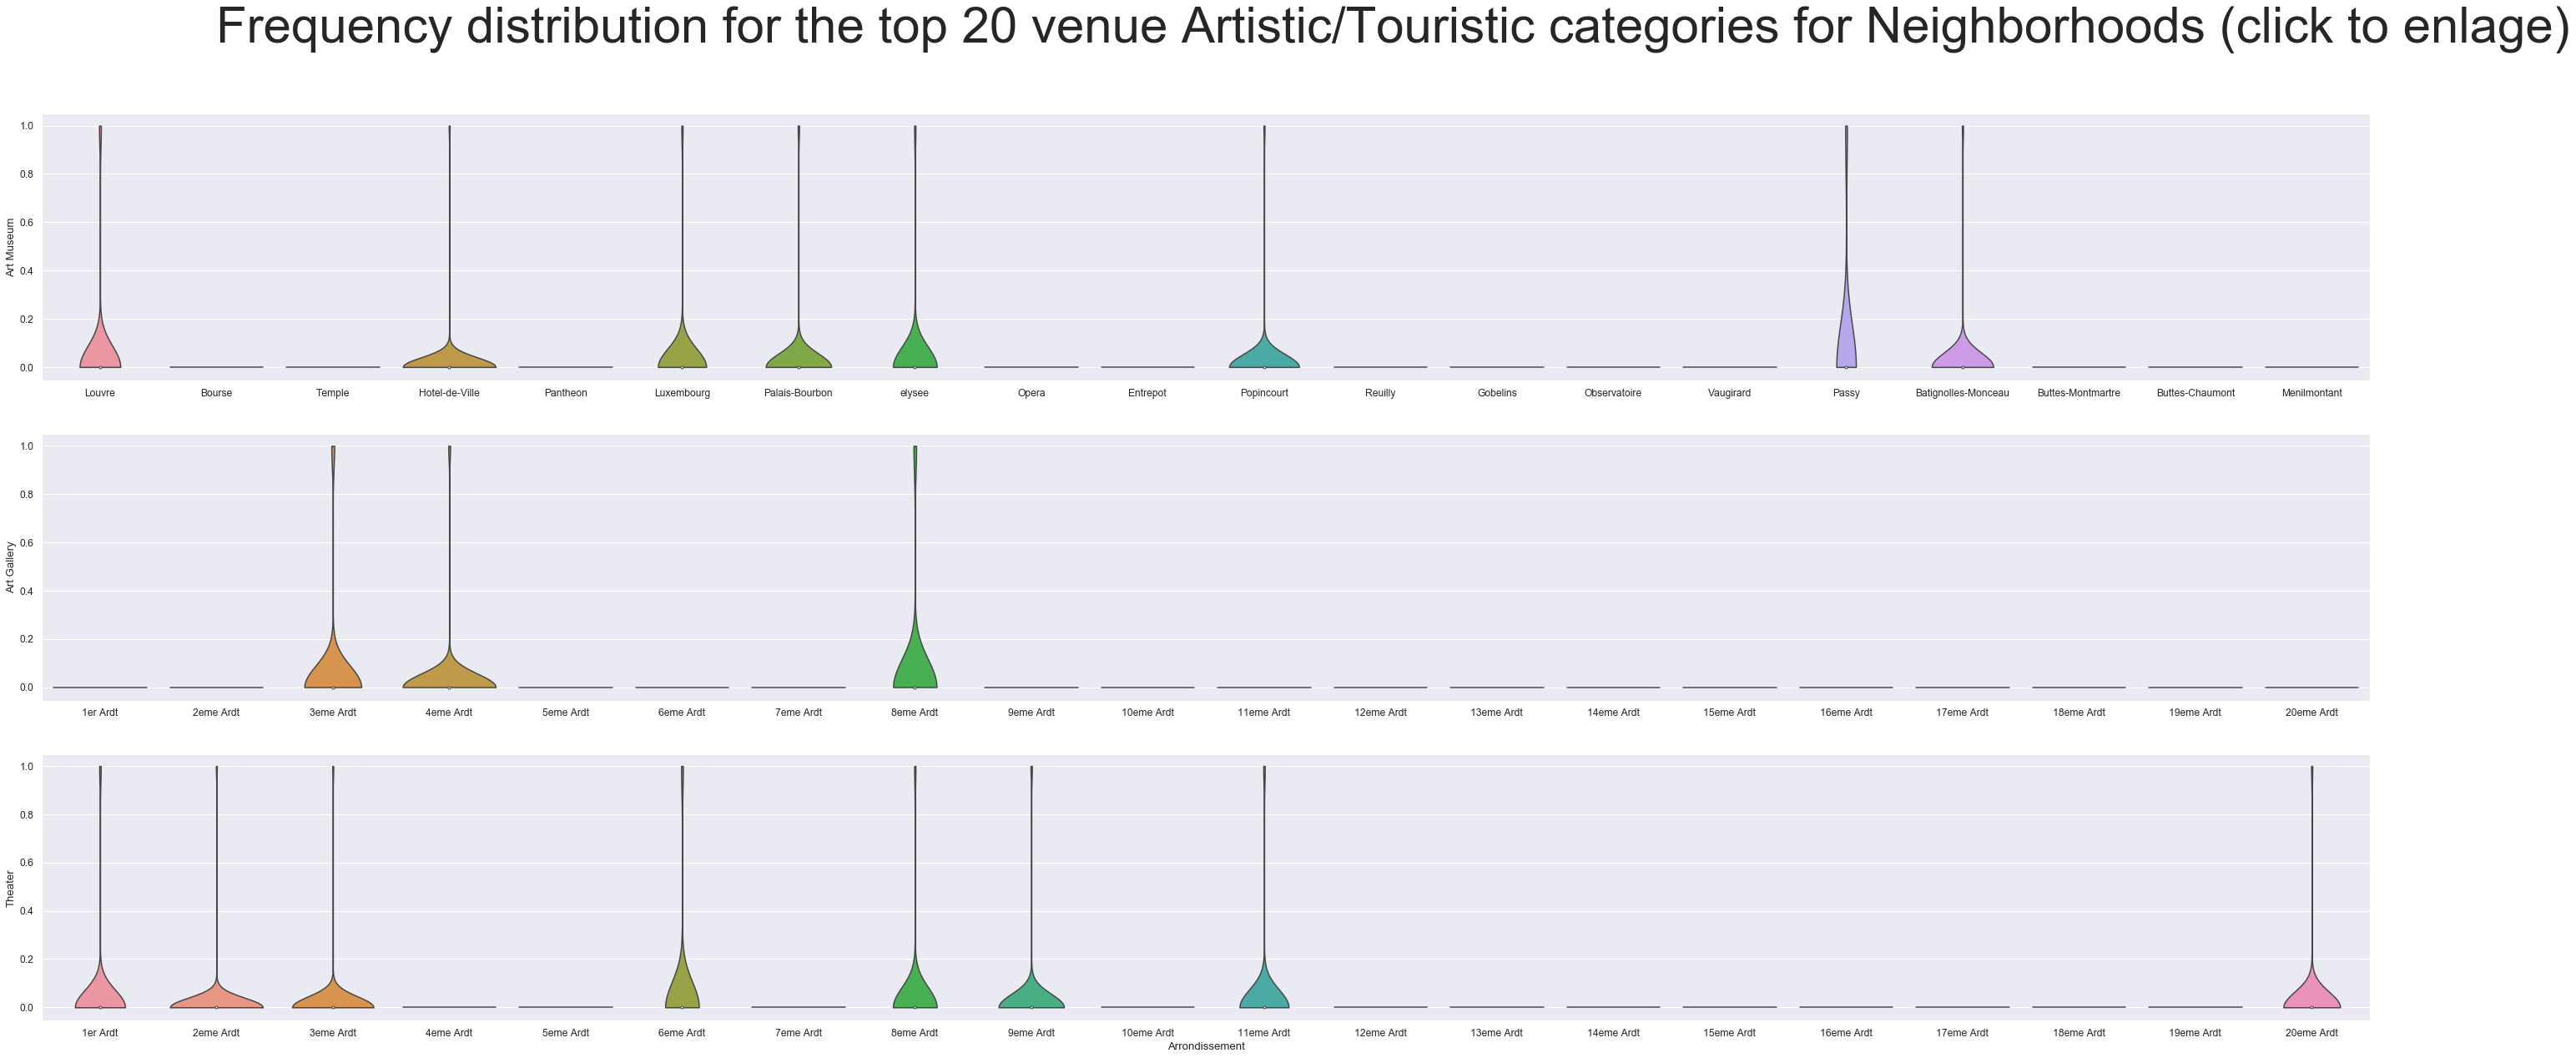

In [58]:
# First we joint One hot encoding data frame for better representation of Violin Plots
paris_violin_new = paris_onehot_new.copy()
paris_violin_new = paris_violin_new.join(paris_data.set_index('Neighborhood'), on='Neighborhood')


fig = plt.figure(figsize=(50,20))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Art Museum", data=paris_violin_new, cut=0)
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Arrondissement", y="Art Gallery", data=paris_violin_new, cut=0)
plt.xlabel("")

ax = plt.subplot(3,1,3)
sns.violinplot(x="Arrondissement", y="Theater", data=paris_violin_new, cut=0)


ax.text(1.0, 4, 'Frequency distribution for the top 20 venue Artistic/Touristic categories for Neighborhoods (click to enlage)', fontsize=60)
#plt.savefig ("Distribution_Frequency_Venues_categories.png", dpi=240)

plt.show()



### *Observations*

So as we can see from the analysis there are many neighborhoods where to seek **artistic activities** mainly **'Art Museum', 'Art Gallery'and 'Theater'** - according to the criteria that they have these 3 specified venues category in a great frequency.

The **first neighborhood** to seek these categories is the **8em Arrondissement** - that is not surprising as it corresponds to the **Elysee.**

Moreover, one can seek artistic activities in other Nieghborhoods corresponding to the centre of Paris City.
They are as follows:

- Arrondissement 1, Louvre
- Arrondissement 3, Temple
- Arrondissement 4, Hotel de Ville
- Arrondissement 6, Luxembourg
- Arrondissement 11, Popincourt

All these are distributed over two clusters concentrated  in the center of Paris City, especially arroud the river 'La seine' of Paris. Those are the Neighbors where one can seek Artistic/Touristic activity in Paris and can be considered where to seek higher levels of trafic areas.

lets recall what we found before for the criteria to include **Restaurants, Coffee Shop, Wine Bars and Clothing Stores** for new stores to be located, and at the same time provides better locations for the brand. the final 3 prospective neighborhoods for new store locations were:

- Arrondissement 2, Bourse
- Arrondissement 3, Temple
- Arrondissement 4, Hotel de Ville

Thus our choice can focus on **2 Neighborhoods** as they correspond also for **Artistic/Touristic** creteria :

- **Arrondissement 3, Temple**
- **Arrondissement 4, Hotel de Ville**


We can try to order/choose between the two locations by looking at the distributions represented on their corresponding Violin Plots to compare their densities. 

Moreover, we will check their geographical densities. As i couldn't get data for trending spots, we can try to use the Density we defined at the start of this section and try to make use of the **surface of neighborhoods** as it can give us more insights for our objective study.

We can define **Geografic Density** as *the quotient of Neighborhoods 'SURFACE' to the number of corresponding venues.*

Lets get the data  to get this.

In [59]:
paris_count = paris_venues.groupby('Neighborhood').count()
paris_count.drop(['Neighborhood Latitude','Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis=1, inplace=True)
paris_count.reset_index(inplace=True)
paris_count


,Neighborhood,Venue
0,Batignolles-Monceau,56
1,Bourse,100
2,Buttes-Chaumont,43
3,Buttes-Montmartre,40
4,Entrepot,100
5,Gobelins,60
6,Hotel-de-Ville,100
7,Louvre,69
8,Luxembourg,40
9,Menilmontant,50


In [60]:
# We join the count of venues per neighborhood to our start data frame to include neighborhoods surface
paris_density = paris_count.join(paris_data.set_index('Neighborhood'), on='Neighborhood')

# We drop unecessary columns
paris_density.drop(['Arrondissement_Num'], axis=1, inplace=True)

# We define a Density perspective as Neighbors Surface devided by the correspondind total number of scrapped venues it contains  
paris_density['Density']=paris_density['SURFACE']/paris_density['Venue']

# We can sort our data base and neighbors now with respect to their level of Density
paris_density = paris_density.sort_values('Density',ascending=True, inplace=False )
paris_density.reset_index(drop = True, inplace=True)

# Just in case, we convert the column Neighborhood to string type as we will use it as key to plot our Choropleth for Paris Neighbors Density
paris_density['Neighborhood'] = paris_density['Neighborhood'].astype(str)
paris_density


,Neighborhood,Venue,Arrondissement,Latitude,Longitude,SURFACE,Density
0,Bourse,100,2eme Ardt,48.868279,2.342803,991153745,9.911537e+06
1,Temple,83,3eme Ardt,48.862872,2.360001,1170882828,1.410702e+07
2,Hotel-de-Ville,100,4eme Ardt,48.854341,2.357630,1600585632,1.600586e+07
3,Opera,100,9eme Ardt,48.877164,2.337458,2178303275,2.178303e+07
4,Louvre,69,1er Ardt,48.862563,2.336443,1824612860,2.644366e+07
5,Entrepot,100,10eme Ardt,48.876130,2.360728,2891739442,2.891739e+07
6,Pantheon,87,5eme Ardt,48.844443,2.350715,2539374623,2.918821e+07
7,Palais-Bourbon,100,7eme Ardt,48.856174,2.312188,4090057185,4.090057e+07
8,Luxembourg,40,6eme Ardt,48.849130,2.332898,2153095586,5.382739e+07
9,Popincourt,67,11eme Ardt,48.859059,2.380058,3665441552,5.470808e+07


### 2nd Inferences and Discussion : *Chosen Neighborhoods - Results*

Finally, we can say that **the Arrondissement 3 has less available surface per venue than the Arrondissement 4**. 

This can be seen differently, we can look for more possibility of available locations in the Arrondissement 4 as it might deliver more liberty as we expect the Arrondissement 3 to be very dense geographicaly with tiny spaces and very small stores And given the distribution desity of target activities (**Violin Plots**), our choice favorise the **Arrondissement 4** as there is also more geographic space available. 


Thus **my final order** would be to look :

- **First choice :  Arrondissement 4 - Hotel de Ville**
- **Second choice : Arrondissement 3 - Temple.**

One can also look for the most suitable locations in our case *alining these two locations and in the direction to* **Arrondissement 8 - Elysee** as the Highest location for tourists.

By this, we are ready to interpret observations and make inferences in order to conclude.

Before that let's check the Two chosen neighbors a well as the 3rd alternative Arrondissement 8 - Les champs Elysee.


In [61]:
# Chosen_districts
chosen=['Hotel-de-Ville', 'Temple', 'elysee']

# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
Paris_chosen = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
colors=['red','blue','magenta'] # Choosen colors to represent the selected two Neighborhods as well as the third alternative
j=0
for i in range(len(paris_data.index)):
    if paris_data['Neighborhood'][i] in chosen:
        
        label = folium.Popup(str(paris_data['Arrondissement'][i]) + ", " + str(paris_data['Neighborhood'][i]) , parse_html=True)
        
        folium.CircleMarker([paris_data['Latitude'][i], paris_data['Longitude'][i]], radius=45, popup=label, color=colors[j], fill=True,
        fill_color='#3186cc', fill_opacity=0.2,parse_html=False).add_to(Paris_chosen)
        
        j=j+1

Paris_chosen


## Observations :

No surprise these Neighborhoods or the most suitable areas we selected - between the 3 of the Arrondissements represented above - of most  are centrally located  in the circular arrangement of Paris's arrondissements in the direction of the alternative selected solution Arrondissement 8 - Champs Elysee. Locations fitting the criteria for popular venues for our selected activities would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that are most suitabe with respect to our certeria.



## Inferences :

We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the most suitable locations selection for certain activities. 

In our case study that is first to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and second to narrow the search down to just a few of the main areas that are best suited to match the specified criteria.



## Conclusions :

There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. 

I proceeded based on Data Science process and chose a method straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in our case study we checked for certain specified activities. First we Clustred Neighbors for most apparent creteria and second we re-clustered for better vision of some hidden creteria - Artistic/Touristic category in order to target as we said higher trafic areas where reasonable Tourists spend their most time when in Paris.

The analysis and results are not an end point, but rather a starting point to guide the process in finding the most suitable locations for specified activities. To push this study further one can involve domain knowledge of the activities of intrest and even the city caracteristics. 

I originally intended to use trending venues data from the Foursquare API in order to formulate a notion of desity as the number of trending spots distributed on the corresponding Neighborhood Surface, and use it to get insights about geographical density of High Trafic areas to take our choice precision level further, but we couldn't get the data unfortunately. This didn't prevent us from checking - with less precision - for a similar formulation for density levels based on the number of venues within each neighborhood.

Moreover, our data analysis and resulting recommendations have greatly narrowed down the most suitable location options based on data we could get hands on and what we could infer from it.

Without leveraging data to make focussed decisions, the process of finding the most suitable location could have been drawn out. Scrapping data from Foursquare API has helped to provide at least a narrow set of solutions for any specified category of activities. Data-driven decisions lead to a better solutions in the end.

Thanks for taking part in my Data Science journey!
